<a href="https://colab.research.google.com/github/appleman0718/qq/blob/main/task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#ANN == DNN 


import os, sys
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axesㅏ3D
from matplotlib import cm

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import he_uniform

tf.random.set_seed(0)

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/데이터/Film_Thickness_Prediction_Data_(Recipe).csv')

In [ ]:
data

,Power,Pressure,C3H6,N2,Thickness
0,250.0,1000.0,100.0,50.0,1023.0
1,250.0,800.0,80.0,50.0,701.0
2,230.0,800.0,80.0,40.0,758.0
3,230.0,1000.0,100.0,40.0,983.0
4,250.0,1000.0,80.0,40.0,1151.0
5,270.0,1000.0,80.0,50.0,1001.0
6,250.0,1000.0,60.0,50.0,1342.0
7,270.0,800.0,80.0,40.0,853.0
8,250.0,1000.0,60.0,30.0,1349.0
9,250.0,800.0,60.0,40.0,1007.0


In [ ]:
X = data.iloc[:,:4]
Y = data.iloc[:,-1]

In [ ]:
#input/ output data(x,y) scaling

Input_Scaler = MinMaxScaler()
X_s = Input_Scaler.fit_transform(X)
Y_s = (Y-np.min(Y))/(np.max(Y)-np.min(Y))

In [ ]:

X_train, X_test, Y_train, Y_test = train_test_split(X_s, Y_s, test_size = 0.1, shuffle = True, random_state = 100)

In [ ]:
#model 구성

model = Sequential()

model.add(Dense(8, kernel_initializer = 'he_uniform', input_dim = 4))
model.add(Activation('elu'))
model.add(Dense(16, kernel_initializer = 'he_uniform'))
model.add(Activation('elu'))
model.add(Dense(16, kernel_initializer = 'he_uniform'))
model.add(Activation('elu'))
model.add(Dense(8, kernel_initializer = 'he_uniform'))
model.add(Activation('elu'))
model.add(Dense(units = 1, activation = 'elu'))

adam = Adam(lr = 0.005)
model.compile(loss = 'mse', optimizer = adam, metrics = ['mae'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 40        
                                                                 
 activation (Activation)     (None, 8)                 0         
                                                                 
 dense_1 (Dense)             (None, 16)                144       
                                                                 
 activation_1 (Activation)   (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 activation_2 (Activation)   (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 8)                 1

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
hist = 0
hist = model.fit(X_train, Y_train, validation_data = (X_test, Y_test), batch_size = 4, epochs = 70)

Epoch 1/70
6/6 [==============================] - 1s 41ms/step - loss: 0.1844 - mae: 0.3192 - val_loss: 0.4761 - val_mae: 0.6247
Epoch 2/70
6/6 [==============================] - 0s 6ms/step - loss: 0.1261 - mae: 0.3034 - val_loss: 0.2577 - val_mae: 0.5000
Epoch 3/70
6/6 [==============================] - 0s 6ms/step - loss: 0.1030 - mae: 0.2639 - val_loss: 0.1287 - val_mae: 0.3582
Epoch 4/70
6/6 [==============================] - 0s 7ms/step - loss: 0.0500 - mae: 0.1931 - val_loss: 0.0047 - val_mae: 0.0672
Epoch 5/70
6/6 [==============================] - 0s 7ms/step - loss: 0.0517 - mae: 0.1810 - val_loss: 0.0765 - val_mae: 0.2676
Epoch 6/70
6/6 [==============================] - 0s 7ms/step - loss: 0.0314 - mae: 0.1403 - val_loss: 0.0761 - val_mae: 0.2630
Epoch 7/70
6/6 [==============================] - 0s 6ms/step - loss: 0.0186 - mae: 0.1119 - val_loss: 0.0518 - val_mae: 0.2070
Epoch 8/70
6/6 [==============================] - 0s 7ms/step - loss: 0.0190 - mae: 0.1105 - val_loss: 

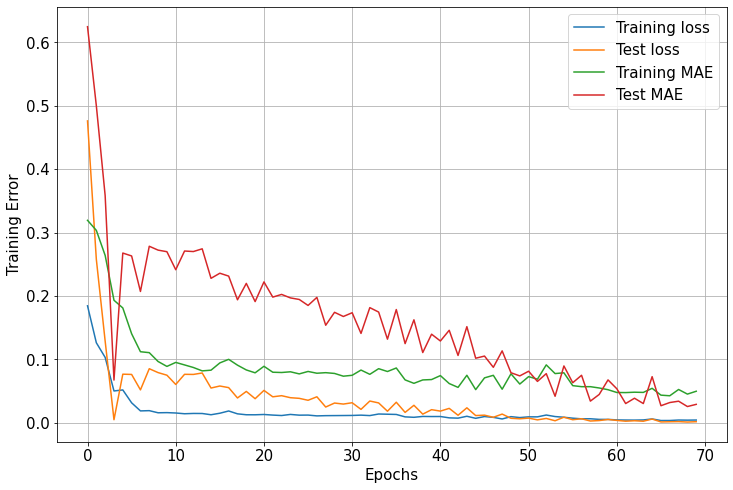

In [ ]:
#학습과정 시각화

plt.figure(figsize = (12,8))

plt.rc('xtick', labelsize = 15)
plt.rc('ytick', labelsize = 15)

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.legend(['Training loss', 'Test loss', 'Training MAE', 'Test MAE'], fontsize = 15)

plt.xlabel('Epochs', fontsize = 15)
plt.ylabel('Training Error', fontsize = 15)

plt.grid()
plt.show()

In [ ]:
Y_test_pred = model.predict(X_test)
Y_train_pred = model.predict(X_train)

1/1 [==============================] - 0s 17ms/step


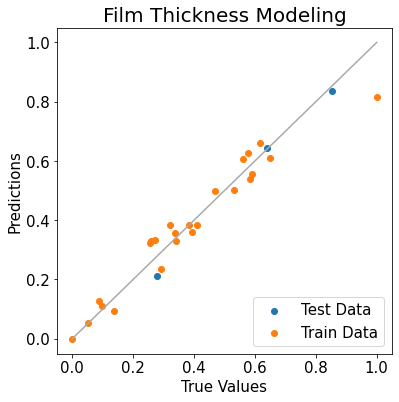

In [ ]:
plt.figure(figsize = (6,6))

plt.rc('xtick', labelsize = 15)
plt.rc('ytick', labelsize = 15)

plt.scatter(Y_test, Y_test_pred, label = 'Test Data')
plt.scatter(Y_train, Y_train_pred, label = 'Train Data')
plt.plot([0,1],[0, 1], c= 'darkgray')
plt.title('Film Thickness Modeling', fontsize = 20)
plt.xlabel('True Values', fontsize = 15)
plt.ylabel('Predictions', fontsize = 15)

plt.legend(loc ='lower right', fontsize =15)

plt.show()

In [ ]:
#min - max scaler 를 원래 값으로 돌리는 작업

Y_train_pred_i = Y_train_pred * (np.max(Y))+np.min(Y)
Y_test_pred_i = Y_test_pred * (np.max(Y)-np.min(Y))+np.min(Y)
Y_train_i = Y_train * (np.max(Y)-np.min(Y))+np.min(Y)
Y_test_i = Y_test * (np.max(Y)-np.min(Y))+np.min(Y)

print('Mean Squared error (MSE)_Train data :',round(mean_squared_error(Y_train_i, Y_train_pred_i),2))
print('Root mean squared error (RMSE)_Train data:',round(mean_squared_error(Y_train_i, Y_train_pred_i)**0.5,2))
print('Mean absolute error (MAE)_Train data:', round(mean_absolute_error(Y_train_i,Y_train_pred_i),2))
print('R2_Train data :', round(r2_score(Y_train_i,Y_train_pred_i),3))



print('Mean Squared error (MSE) test data :',round(mean_squared_error(Y_test_i, Y_test_pred_i),2))
print('Root mean squared error (RMSE)_test data:',round(mean_squared_error(Y_test_i, Y_test_pred_i)**0.5,2))
print('Mean absolute error (MAE)_test data:', round(mean_absolute_error(Y_test_i,Y_test_pred_i),2))
print('R2_test data :', round(r2_score(Y_test_i,Y_test_pred_i),3))

Mean Squared error (MSE)_Train data : 92481.85
Root mean squared error (RMSE)_Train data: 304.11
Mean absolute error (MAE)_Train data: 269.07
R2_Train data : -0.492
Mean Squared error (MSE) test data : 1906.28
Root mean squared error (RMSE)_test data: 43.66
Mean absolute error (MAE)_test data: 31.84
R2_test data : 0.972


In [ ]:
data_modeling_3d = pd.read_csv('/content/drive/MyDrive/데이터/Recipe_Power_Pressure.csv')

In [ ]:
data_modeling_3d_s = Input_Scaler.transform(data_modeling_3d)

3/3 [==============================] - 0s 4ms/step


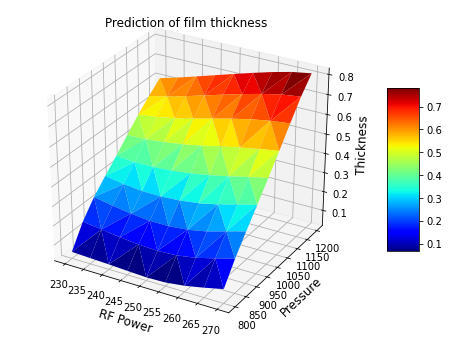

In [ ]:
prediction_3d = model.predict(data_modeling_3d_s)
prediction_3d_i = prediction_3d*(np.max(Y)-np.min(Y))+np.min(Y)

fig= plt.figure(figsize= (8,6))
plt.rc('xtick',labelsize = 10)
plt.rc('ytick', labelsize = 10)

ax = fig.add_subplot(111,projection = '3d')
data_modeling_3d = np.array(data_modeling_3d)

X = data_modeling_3d[:,0]
Y = data_modeling_3d[:,1]
Z = prediction_3d[:,0]


surf = ax.plot_trisurf(X,Y,Z , cmap = cm.jet)
ax.set_title('Prediction of film thickness', fontsize = 12)
ax.set_xlabel('RF Power', fontsize = 12)
ax.set_ylabel('Pressure', fontsize = 12)
ax.set_zlabel('Thickness', fontsize = 12)

fig.colorbar(surf, shrink = 0.5, aspect =5)